In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Example 1.

Given an on-off control (with hysteresis) of a simple heating process represented by the transfer function $$G(s)=\frac{k}{1+T_1s}e^{-s\tau}$$

The parameter values are : $k=0.9[^{\circ}C/\%], T_1=3[tu], \tau=1/6[tu]$.

a.) Plot the step response of the process!

b.) Plot the switch-on and switch-off transients! ($u_0=100 \%$)

c.) Assuming the reference value is $r=45^{\circ} C$, $u_0=100 \%$, and the width of the hysteresis band is $h=2^{\circ} C$. Calculate the cycle time $T_c$ of the control!



In [5]:
# a.)
k = 0.9
T1 = 3
tau = 1/6
t = np.linspace(0,20,1000)
vt = k*(1-np.exp(-(t-tau)/T1))*(t>tau)

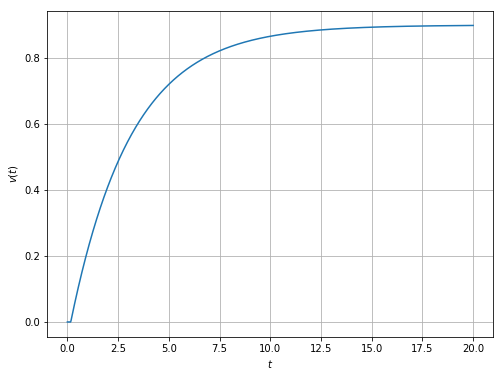

In [6]:
plt.figure(figsize=(8,6))
plt.plot(t,vt)
plt.xlabel(r'$t$'),plt.ylabel(r'$v(t)$'), plt.grid(True);

In [9]:
# b.)
k = 0.9
T1 = 3
tau = 1/6
u0 = 100
t = np.linspace(0,20,1000)
yt_swON = u0*k*(1-np.exp(-t/T1))
yt_swOFF = u0*k*(np.exp(-t/T1))

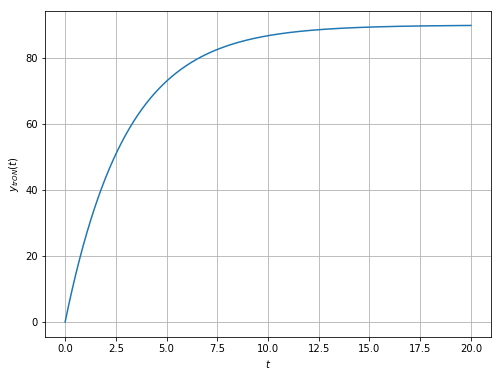

In [10]:
plt.figure(figsize=(8,6))
plt.plot(t,yt_swON)
plt.xlabel(r'$t$'),plt.ylabel(r'$y_{trON}(t)$'), plt.grid(True);

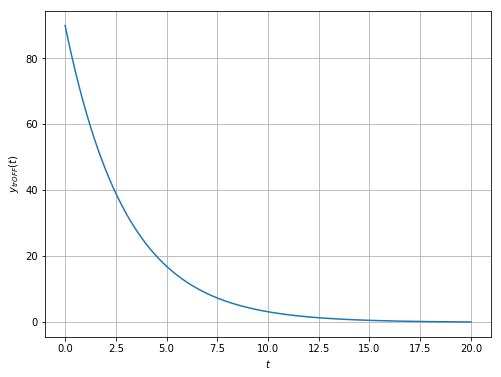

In [11]:
plt.figure(figsize=(8,6))
plt.plot(t,yt_swOFF)
plt.xlabel(r'$t$'),plt.ylabel(r'$y_{trOFF}(t)$'), plt.grid(True);

### Formulas used

$$ T_c = T_{on} + T_{off} $$

$$ T_{on} = -T_1 \ln\left(1-\frac{\Delta y}{k u_0-(r-h-\Delta y_{on})}\right) $$

$$ T_{off} = -T_1 \ln\left(1-\frac{\Delta y}{r+h+\Delta y_{off}}\right) $$

$$ \Delta y = 2h + \Delta y_{on} + \Delta y_{off} $$

$$ \Delta y_{on} = (r-h)(1-e^{-\frac{\tau}{T_1}}) $$

$$ \Delta y_{off} = [ku_0-(r+h)](1-e^{-\frac{\tau}{T_1}}) $$

In [12]:
# c.)
# parameters
k = 0.9
T1 = 3
tau = 1/6
r = 45
u0 = 100
h = 2
# calculations
dy_on = (r-h)*(1-np.exp(-tau/T1))
dy_off = (k*u0-r-h)*(1-np.exp(-tau/T1))
dy = 2*h + dy_off + dy_on
T_on = -T1*np.log(1-dy/(k*u0-r+h+dy_on))
T_off = -T1*np.log(1-dy/(r+h+dy_off))
Tc = T_on + T_off

# additional info
y_max = r+h+dy_off
y_min = r-h-dy_on
y_avg = (y_max+y_min)/2

In [13]:
dy_on, dy_off, dy, T_on, T_off, Tc, y_max, y_min, y_avg

(2.323742837009087,
 2.323742837009087,
 8.647485674018174,
 0.5782830123209137,
 0.5782830123209137,
 1.1565660246418275,
 49.323742837009085,
 40.676257162990915,
 45.0)

## Example 2.

a.) Create a plot of the setpoint dependence of $T_{on}$ and $T_{off}$ times!
Plot the exact and approxiamate values as well!

b.) Plot the setpoint dependence of the cycle time $T_c$!

In [14]:
# parameters
k = 0.9
T1 = 3
tau = 1/6
r = np.linspace(20,80,100)
u0 = 100
h = 2
# calculations
dy_on = (r-h)*(1-np.exp(-tau/T1))
dy_off = (k*u0-r-h)*(1-np.exp(-tau/T1))
dy = 2*h + dy_off + dy_on
T_on = -T1*np.log(1-dy/(k*u0-r+h+dy_on))
T_off = -T1*np.log(1-dy/(r+h+dy_off))
Tc = T_on + T_off

# approximate T_on, and T_off
T_on_approx = T1*(dy/(k*u0-r))
T_off_approx = T1*(dy/r)

# additional info
y_max = r+h+dy_off
y_min = r-h-dy_on
y_avg = (y_max+y_min)/2

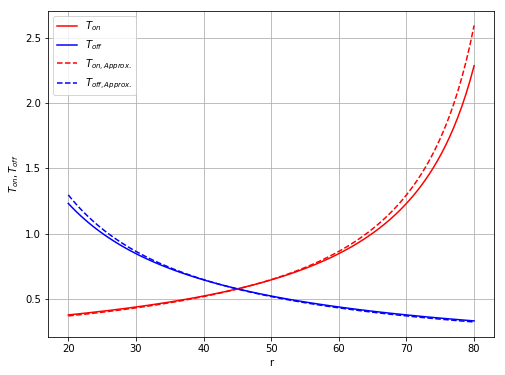

In [33]:
# a.)
# plot
plt.figure(figsize=(8,6))
plt.plot(r, T_on,'r-')
plt.plot(r, T_off,'b-')
plt.plot(r, T_on_approx,'r--')
plt.plot(r, T_off_approx,'b--')
plt.xlabel('r'), plt.ylabel(r'$T_{on}, T_{off}$')
plt.legend([r'$T_{on}$',r'$T_{off}$',r'$T_{on, Approx.}$',r'$T_{off, Approx.}$'])
plt.grid(True)

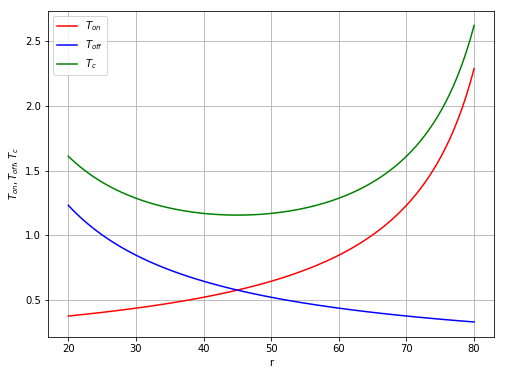

In [34]:
#b.)
plt.figure(figsize=(8,6))
plt.plot(r, T_on,'r-')
plt.plot(r, T_off,'b-')
plt.plot(r, Tc,'g-')
plt.xlabel('r'), plt.ylabel(r'$T_{on}, T_{off}, T_c$'), plt.legend([r'$T_{on}$',r'$T_{off}$',r'$T_c$'])
plt.grid(True)
#plt.savefig('test.eps')

### Homework

1. Create a plot for the setpoint dependence of average power consumption (measured in %)!

In [29]:
#

2. Approximate the system given by its measured step response below by a First-order plus time delay (FOPTD) system ($G(s)=\frac{k}{1+T_1s}e^{-\tau s}$), give an estimation of the parameters $k,T_1,$ and $\tau$ !

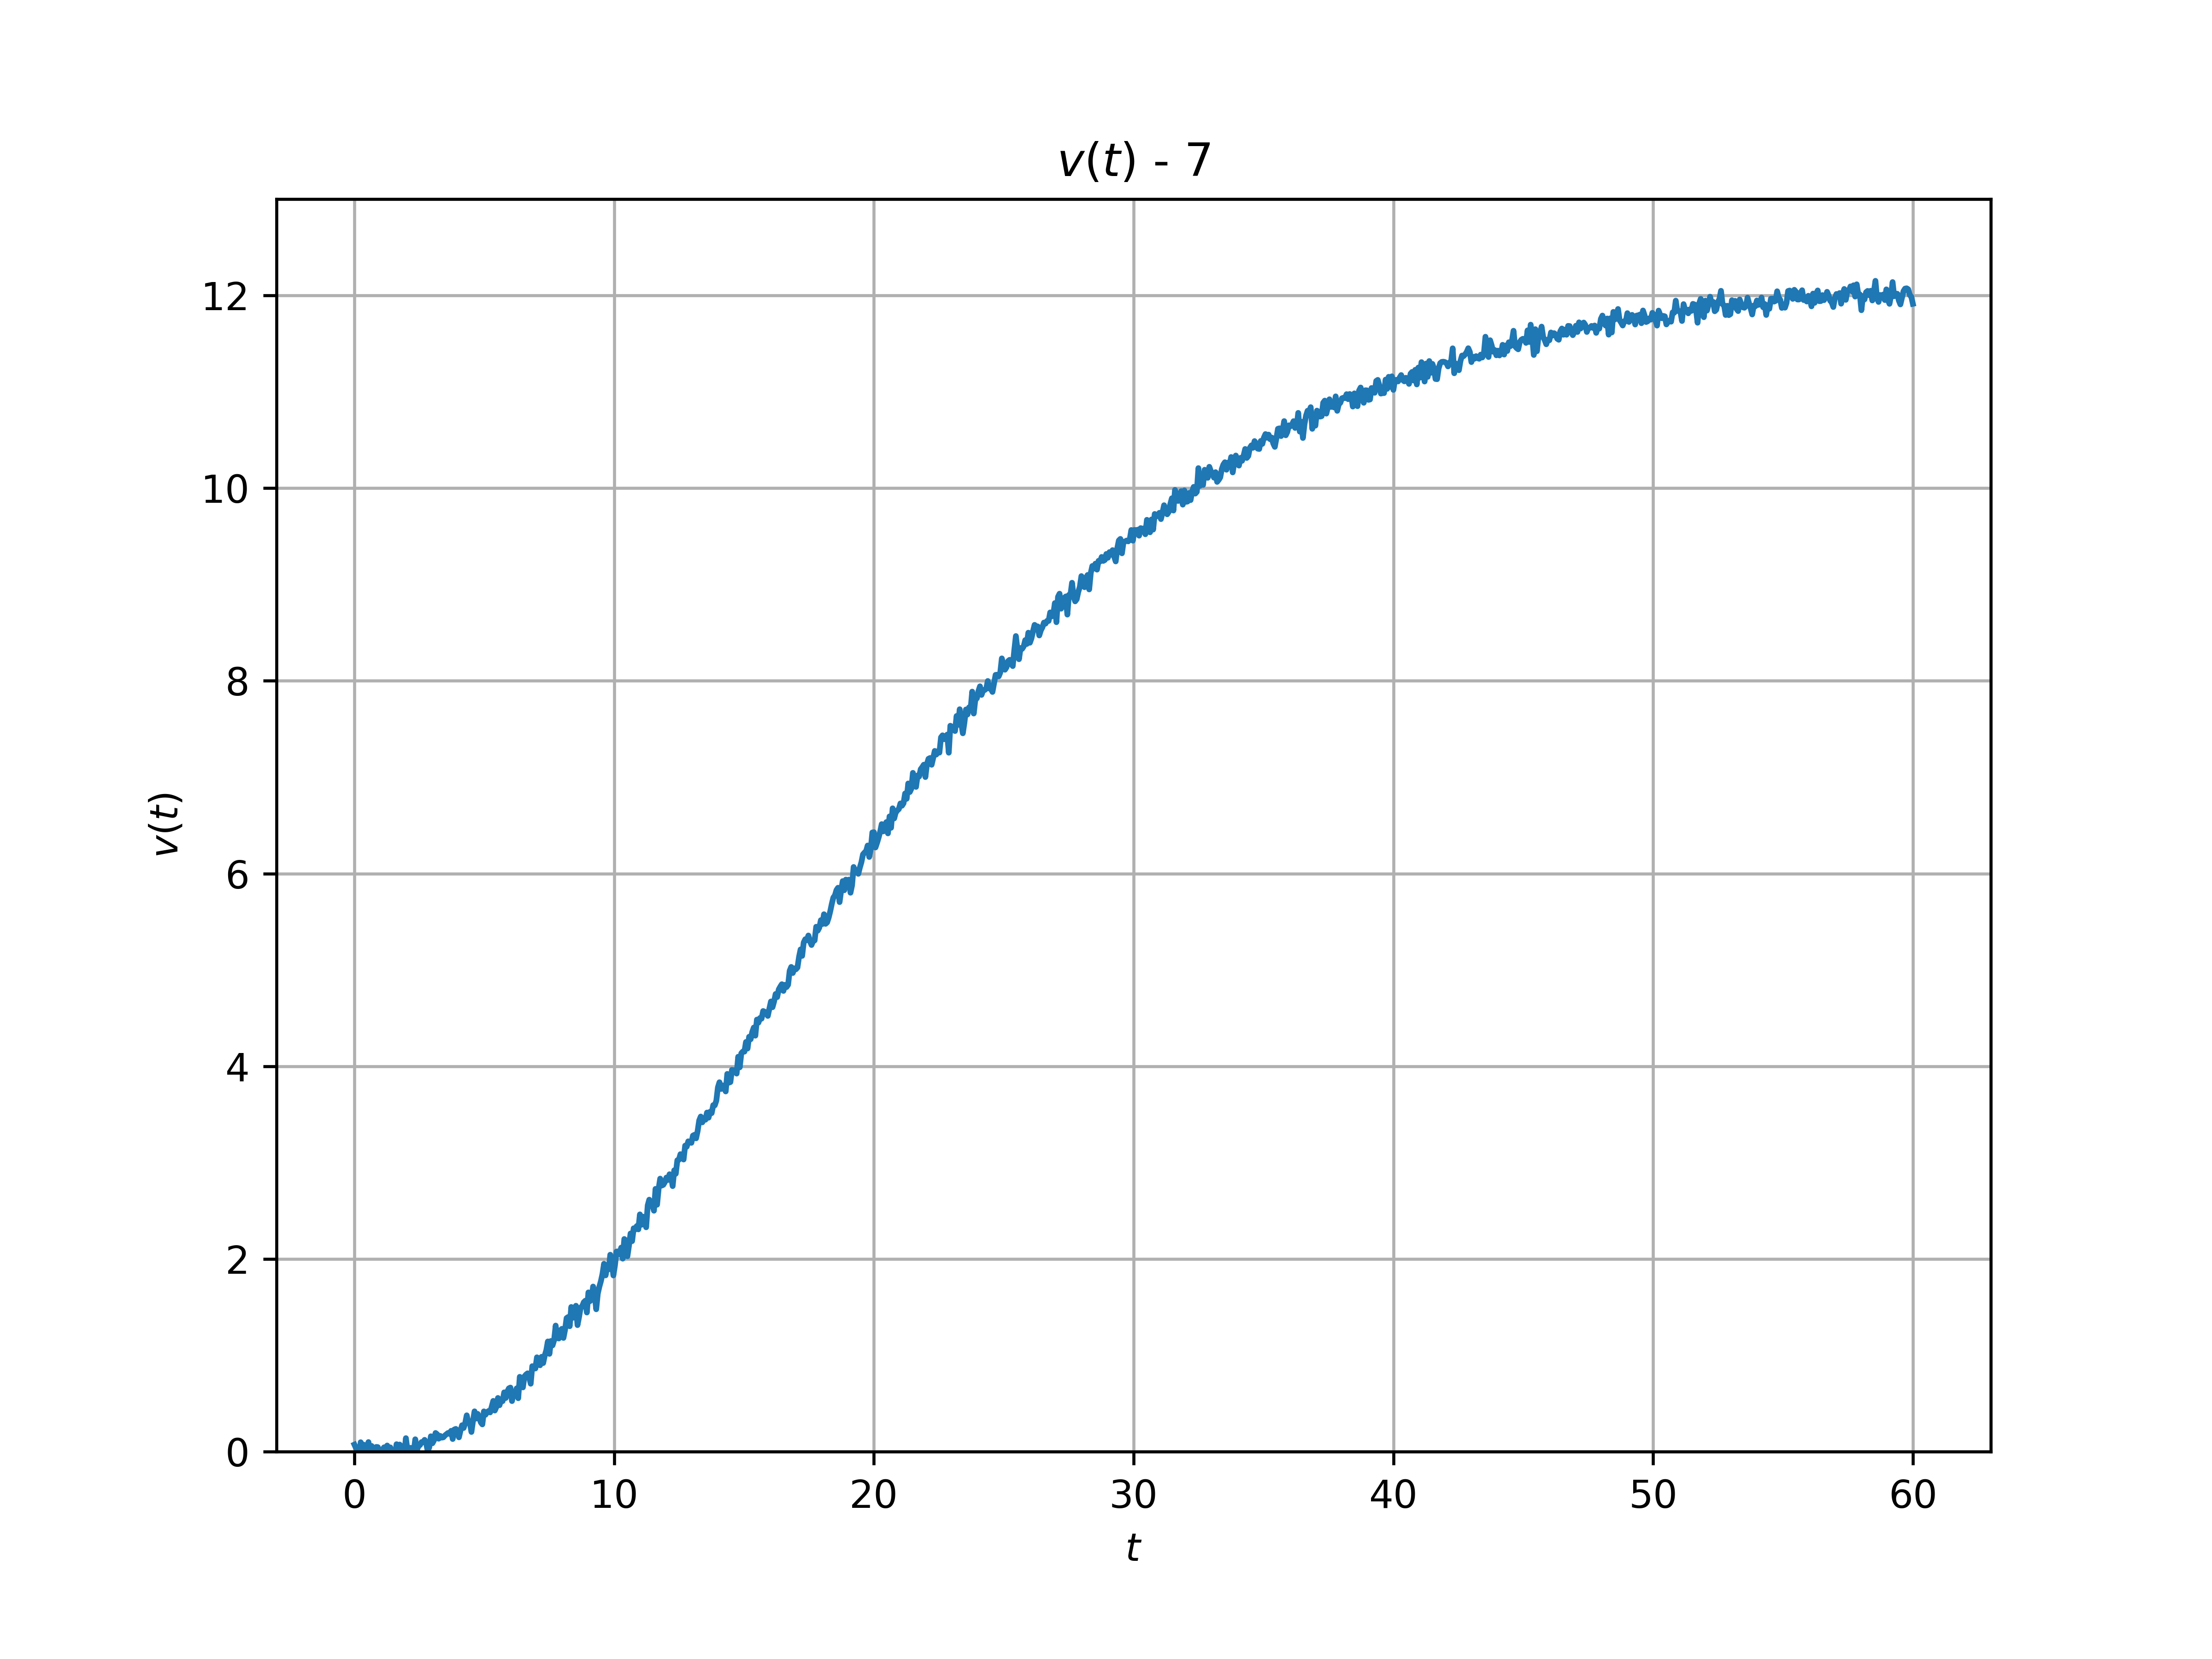

In [30]:
#

3. Given the Bode-plot of the open loop system, estimate the gain margin $G_M$ and phase margin $\varphi_M$ of the closed loop system!

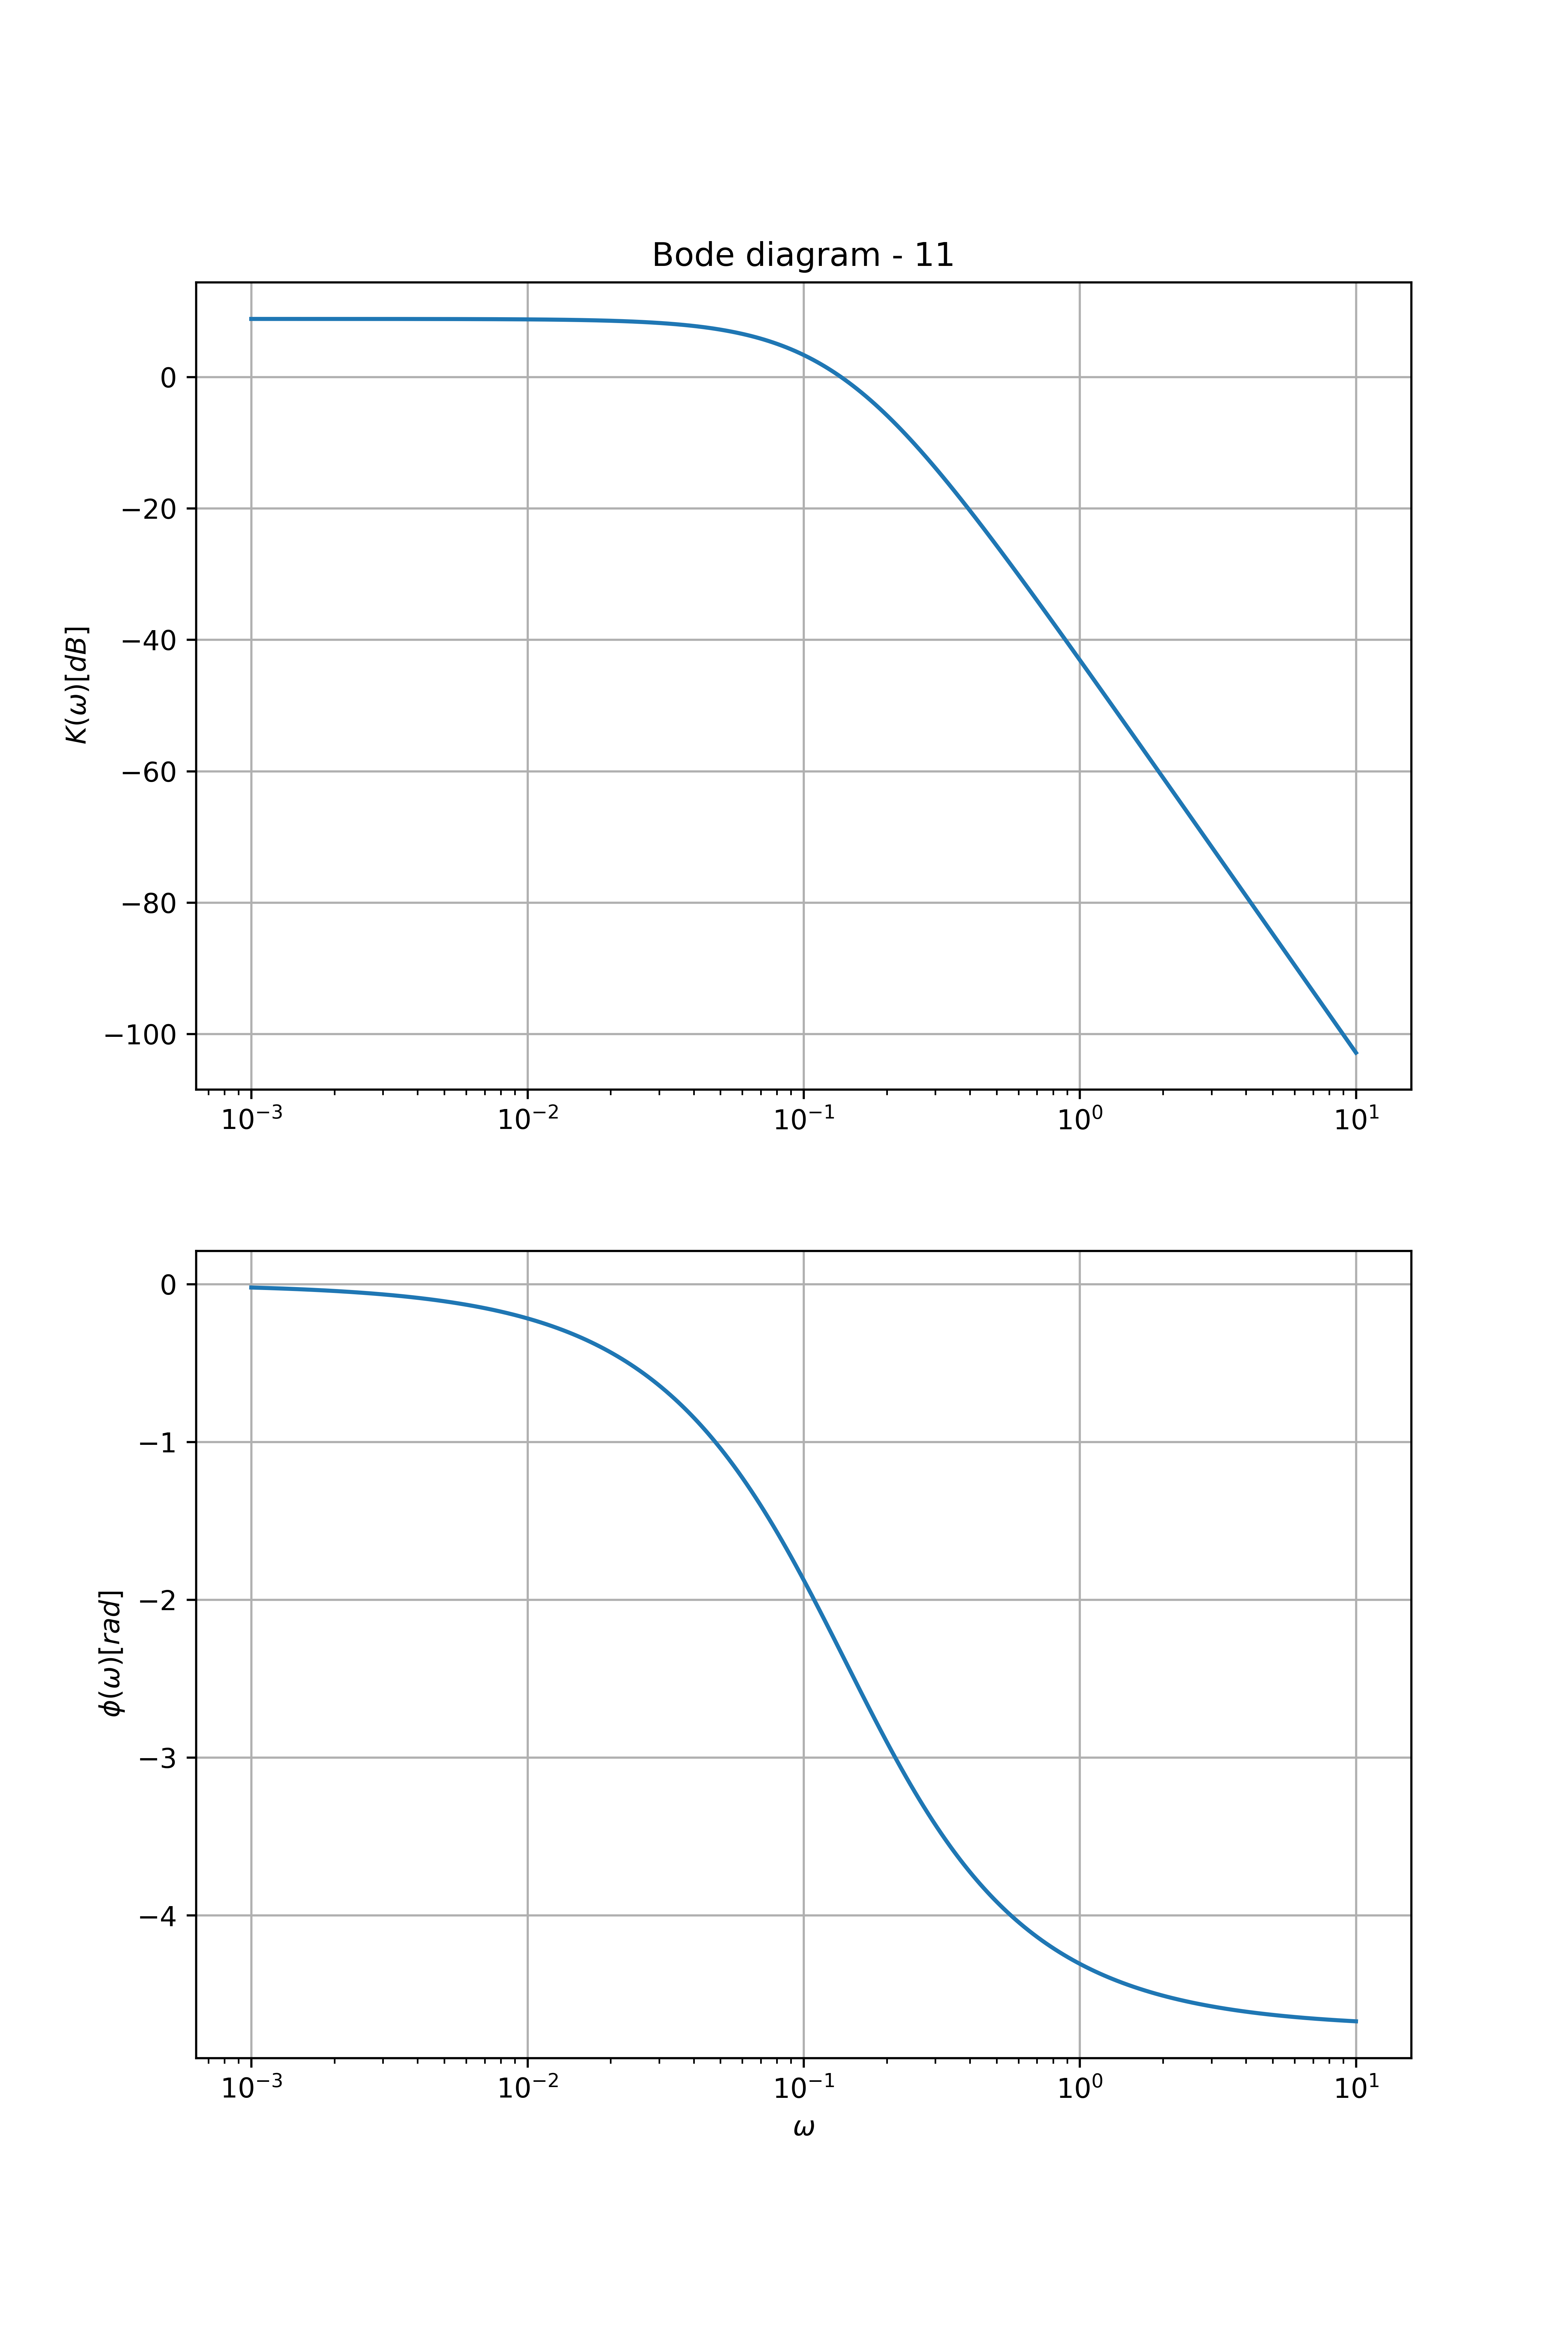

In [31]:
#